<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/CAPA%20CORONA%202.png?raw=true">

#### **Panorama do COVID-19 no Mundo e no Brasil**
*by [Ellen Paes](https://www.linkedin.com/in/ellenpaes)*

---



Até o momento desta análise (Jul/2020), cientistas de todo o mundo estão empenhados em estudar os efeitos, as consequências e a busca pela tão desejada vacina para o **coronavírus COVID-19**. Embora os estudos avancem, ainda não são conclusivos ou definitivos. Sabemos que trata-se de uma família de vírus que causam infecções respiratórias e que podem variar desde um resfriado até uma pneumonia severa, podendo levar o paciente a óbito.

Segundo citado no site do Ministério da Saúde, a OMS classifica que cerca de **80%** dos infectados podem ser assintomáticos, **15%** podem requerer algum tipo de atendimento hospitalar por apresentarem dificuldade respiratória e **5%** serão enquadrados como casos de infecção respiratória mais grave e demandará necessidade de ventilação assistida, por meio de respiradores em instalações hospitalares.

A sua transmissão ocorre por meio de gotículas provenientes de tosses ou espirros e em função de termos em torno de 80% de assintomáticos, isso contribuiu na velocidade de transmissão já que a pessoa não sabe que está infectada e, com isso, não realiza o protocolo médico de isolamento, dando continuidade a propagação do vírus em sua comunidade, ciclo familiar e profissional.

Para maiores informações acesse fontes confiáveis como a [Organização Mundial da Saúde](https://www.who.int/) e o [Center for Disease Control and Prevention](https://www.cdc.gov/). No Brasil, as Secretarias Estaduais de Saúde podem se uma fonte de dados, assim como o site do [Ministério da Saúde](https://coronavirus.saude.gov.br/), apesar das recentes divergências sobre disponibilização dos dados.

Abaixo, segue uma breve análise exploratória dos dados disponibilizados.

## Obtenção dos Dados

Todos os dados utilizados aqui foram retirados do **[Our World in Data](https://ourworldindata.org/)** uma iniciativa brilhante de pessoas que buscam dar visibilidade sobre os grandes problemas do mundo de forma acessível e compreensível através dos dados, como descrevem em sua missão!


### Dicionário de Variáveis

* iso_code: É uma padronização internacional que considera 3 letras para o nome do país.
* continent: Continente onde o país está localizado
* location: Localização geográfica
* date: Data da observação
* total_cases: Total de casos de COVID-19 confirmados
* new_cases: Novos casos de COVID-19 confirmados
* total_deaths: Total de mortes atribuídas por COVID-19
* new_deaths: Novas mortes atribuídas por COVID-19
* total_cases_per_million: Total de casos de COVID-19 confirmados por 1.000.000 pessoas
* new_cases_per_million: Novos casos de COVID-19 confirmados por 1.000.000 pessoas
* total_deaths_per_million: Total de mortes atribuídas por COVID-19 por 1.000.000 pessoas
* new_deaths_per_million: Novas mortes atribuídas por COVID-19 por 1.000.000 pessoas
* total_tests:Total de testes para COVID-19
* new_tests: Novos testes para COVID-19
* total_tests_per_thousand: Total de teste para COVID-19 por 1.000 pessoas
* new_tests_per_thousand: Novos teste para COVID-19 por 1.000 pessoas
* tests_units: Unidades usadas pelo local para relatar seus dados de teste
* stringency_index: Índice de Rigor da Resposta do Governo: medida composta baseada em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionados para um valor de 0 a 100 (100 = resposta mais estrita)
* population: População em 2020
* population_density: Número de pessoas divididas por área terrestre, medida em quilômetros quadrados, no ano mais recente disponível
* median_age: Idade média da população, projeção da ONU para 2020
* aged_65_older: Proporção da população com 65 anos ou mais, ano mais recente disponível
* aged_70_older: Percentagem da população com 70 anos ou mais em 2015
* gdp_per_capita: Produto interno bruto com paridade do poder de compra (dólares internacionais constantes de 2011), último ano disponível
* extreme_poverty: Percentagem da população que vive em extrema pobreza, último ano disponível desde 2010
* cvd_death_rate: Taxa de mortalidade por doenças cardiovasculares em 2017
* diabetes_prevalence: Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017
* female_smokers: Percentagem de mulheres que fumam, último ano disponível
* male_smokers: Percentagem de homens que fumam, último ano disponível
* handwashing_facilities: Proporção da população com instalações básicas de higienização das mãos, último ano disponível
* hospital_beds_per_thousand: Camas de hospital por 1.000 pessoas, último ano disponível desde 2010
* life_expectancy: Expectativa de vida no nascimento em 2019




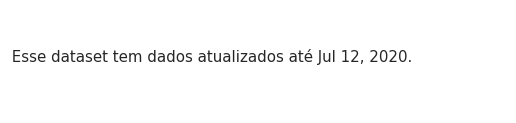

In [162]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

last_update = pd.to_datetime('today').date()
month = last_update.strftime('%b')

fig, ax = plt.subplots(figsize=(9, 2))
ax.text(x=0, y=0.5, s=f' Esse dataset tem dados atualizados até {month} {last_update.day}, {last_update.year}.', fontsize=15, ha='left')
ax.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=False)
ax.grid(False)
ax.set_facecolor('white')
for key, spine in ax.spines.items():
  spine.set_visible(False)


## Exploração inicial do dataset


Nesta etapa, o objetivo é conhecer a estrutura do conjunto de dados e trabalhar em alguns processamentos nas variáveis para que as análises não sejam comprometidas. 

In [163]:
# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
#df.index = df.date
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Através do código abaixo, podemos identificar o tamanho do nosso dataset, a quantidade de colunas existentes, o tipo de dados e a quantidade de dados não nulos. Já é um bom indício para explorar sobre dados faltantes.

In [164]:
# Tamanho do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# Verificar o tipo de variáveis
df.info()

Entradas:	 29801
Variáveis:	 34
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29801 entries, 0 to 29800
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         29737 non-null  object 
 1   continent                        29542 non-null  object 
 2   location                         29801 non-null  object 
 3   date                             29801 non-null  object 
 4   total_cases                      29490 non-null  float64
 5   new_cases                        29490 non-null  float64
 6   total_deaths                     29490 non-null  float64
 7   new_deaths                       29490 non-null  float64
 8   total_cases_per_million          29426 non-null  float64
 9   new_cases_per_million            29426 non-null  float64
 10  total_deaths_per_million         29426 non-null  float64
 11  new_deaths_per_million           29426 non-null 

Observem que a variável `date()` é do tipo object e teremos que transformá-la em um `datetime()` para trabalhar com a variável data.

In [165]:
# Alterar o tipo da variável Data
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

Através do `head()` já é possível ver os nomes das colunas existentes no dataframe, mas uma forma tão simples quanto o `head()` é o código `df.columns` para visualização breve dos nomes das variáveis.

In [166]:
# Verificar os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Sabemos que analisar um dataset com muitos dados faltantes pode ser bastante comprometedor para o estudo. Através do código abaixo, será possível identificar o percentual de dados faltantes de todas as colunas existentes. Não será escopo deste projeto realizar tratamento de dados faltantes.
Caso deseje verificar o top 10 de dados faltantes, basta incluir a seguinte informação `[:10]` ao final do código. :)

In [170]:
# Identificar a porcentagem de valores ausentes das variáveis em ordem decrescente 
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.707325
new_tests_per_thousand             0.707325
total_tests_per_thousand           0.693970
total_tests                        0.693970
new_tests_smoothed_per_thousand    0.667830
new_tests_smoothed                 0.667830
tests_units                        0.644509
handwashing_facilities             0.590618
extreme_poverty                    0.403846
male_smokers                       0.288715
female_smokers                     0.280259
stringency_index                   0.196436
hospital_beds_per_thousand         0.177309
aged_65_older                      0.111372
gdp_per_capita                     0.109023
aged_70_older                      0.103117
median_age                         0.098487
cvd_death_rate                     0.097715
diabetes_prevalence                0.067884
population_density                 0.044260
life_expectancy                    0.013926
new_deaths_per_million             0.012583
total_deaths_per_million        

Sabemos que a análise correlacional indica a relação entre 2 variáveis e seus valores sempre vão variar entre +1 e -1. Esta sinalização é para indicar a direção da correção positiva ou negativa e o seu valor indica quão forte ou não essas relação é. Para fins de referência, importante considerar:

*   **Correlação muito forte:** acima de 0.9 (positiva ou negativa)
*   **Correlação forte:** entre 0.7 e 0.9 (positiva ou negativa)
*   **Correlação moderada:** entre 0.5 e 0.7 (positiva ou negativa)
*   **Correlação fraca:** entre 0.3 e 0.5 (positiva ou negativa)
*   **Correlação desprezível:** abaixo de 0.3(positiva ou negativa)



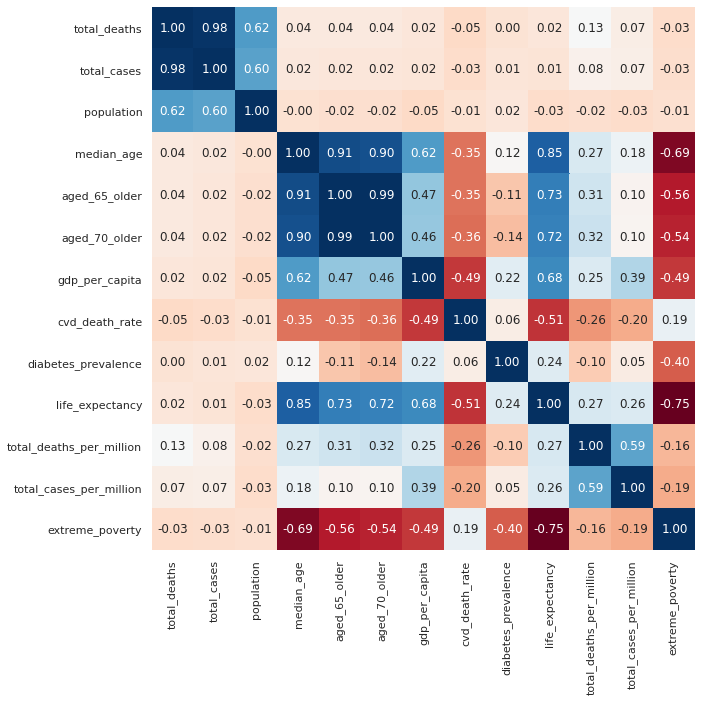

In [189]:
# Correlacao entre as variáveis
corr = df[['total_deaths','total_cases',
       'population', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cvd_death_rate', 'diabetes_prevalence', 'life_expectancy', 
       'total_deaths_per_million', 'total_cases_per_million','extreme_poverty']].corr()

# Elaboração do gráfico
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax, square=True, linecolor='white', cmap='RdBu', cbar=False);

Da figura acima, destaco as seguintes correlações:

1.   Relação muito forte positiva entre `[total_cases]` e `[total_deaths]`. A variável `[total_cases]` aumenta, a variável `[total_deaths]`também aumenta.
2.   Relação moderada negativa entre `[gdp_per_capita]` e `[cvd_death_rate]`. A variável `[gdp_per_capita]` aumenta e a variável `[cvd_death_rate]` diminui.




## Panorama Global

Para que possamos traçar um panorama do mundo, criaremos um dataset chamado `[df_Word]` para trabalharmos com os dados. Considerei a variável `[date]` como índice do dataset para que os gráficos ficassem melhor agrupados. Na sequência, aplicamos o script para criação de 5 gráficos para verificar a evolução de casos e mortes de forma linear e também exponencial, utilizando a escala logarítmica.

In [ ]:
# Preparação dos dados Mundo
df_World = df.loc[df.location == "World"].copy()
df_World.index = df_World.date

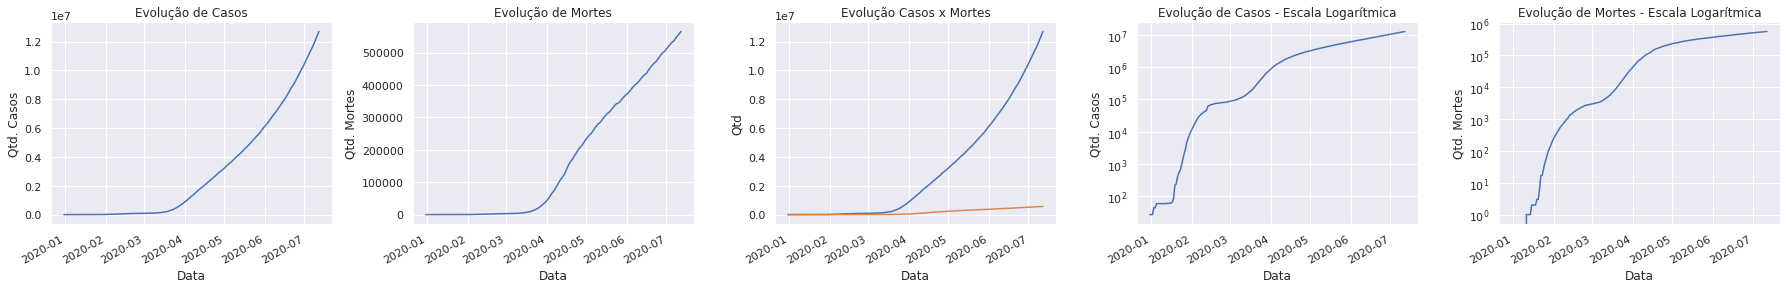

In [192]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(25,4))

ax1.plot('date', 'total_cases', data=df_World)
ax1.set_title('Evolução de Casos')
ax1.set_xlabel('Data')
ax1.set_ylabel('Qtd. Casos')

ax2.plot('date', 'total_deaths', data=df_World)
ax2.set_title('Evolução de Mortes')
ax2.set_xlabel('Data')
ax2.set_ylabel('Qtd. Mortes')

ax3.plot(df_World[['total_cases', 'total_deaths']])
ax3.set_title('Evolução Casos x Mortes')
ax3.set_ylabel('Qtd')
ax3.set_xlabel('Data')

ax4.plot('date', 'total_cases', data=df_World)
ax4.set_title('Evolução de Casos - Escala Logarítmica')
ax4.set_xlabel('Data')
ax4.set_ylabel('Qtd. Casos')
ax4.set_yscale('log')

ax5.plot('date', 'total_deaths', data=df_World)
ax5.set_title('Evolução de Mortes - Escala Logarítmica')
ax5.set_xlabel('Data')
ax5.set_ylabel('Qtd. Mortes')
ax5.set_yscale('log')

plt.tight_layout()
fig.autofmt_xdate() # automaticamente realiza a rotação do eixo para melhor visualização
plt.show()

Podemos observar nas imagens acima que o Coronavírus continua a avançar na quantidade de casos e mortes pelo mundo. No entanto, se observarmos a escala logarítmica, é possível observar que nos últimos 3 meses temos um comportamento nesse crescimento diferente de Fevereiro e Março de 2020, concorda? Observe que nestes meses temos um crescimento agudo (exponencial) rápido da quantidade de casos e mortes. Já nos últimos meses, observa-se que esse cenário ainda que assustador, ocorre de forma mais lenta porém contínua. Infelizmente, ainda não é possível visualizar, um sinal de estabilização e finalmente de queda quando analisamos o cenário consolidado de casos no mundo.
Porém, é importante realizarmos análises independentes por país, pois temos diferentes estágios da doença ao redor do mundo, desde um controle do vírus na China, Itália e Reino Unido, até ausência de controle nos Estados Unidos e Brasil. Portanto, abaixo criaremos datasets por país para continuarmos nossas explorações.

In [179]:
#Top 5 Países com mais casos e mortes de Covid-19
df_casos = df.loc[df.date == '2020-07-10', ['location', 'total_cases','date']].sort_values(by="total_cases", ascending=False)[1:6]
df_mortes = df.loc[df.date == '2020-07-10', ['location', 'total_deaths','date']].sort_values(by='total_deaths', ascending=False)[1:6]

print('Top 5 - Casos {}'.format(df_casos))
print('Top 5 - Mortes{}'.format(df_mortes))

Top 5 - Casos             location  total_cases       date
28354  United States    3118008.0 2020-07-10
4018          Brazil    1755779.0 2020-07-10
12632          India     793802.0 2020-07-10
22500         Russia     707301.0 2020-07-10
21359           Peru     316448.0 2020-07-10
Top 5 - Mortes             location  total_deaths       date
28354   United States      133291.0 2020-07-10
4018           Brazil       69184.0 2020-07-10
28159  United Kingdom       44602.0 2020-07-10
13905           Italy       34926.0 2020-07-10
17787          Mexico       33526.0 2020-07-10


In [180]:
# Preparacao dos dados Países

df_Brazil = df.loc[df.location == "Brazil"].copy()
df_UnitedStates = df.loc[df.location == "United States"].copy()
df_UnitedKingdom = df.loc[df.location == "United Kingdom"].copy()
df_Italy = df.loc[df.location == "Italy"].copy()
df_Mexico = df.loc[df.location == "Mexico"].copy()
df_Russia = df.loc[df.location == "Russia"].copy()
df_India = df.loc[df.location == "India"].copy()
df_Peru = df.loc[df.location == "Peru"].copy()


df_Brazil.index = df_Brazil.date
df_UnitedStates.index = df_UnitedStates.date
df_UnitedKingdom.index = df_UnitedKingdom.date
df_Italy.index = df_Italy.date
df_Mexico.index = df_Mexico.date
df_Russia.index = df_Russia.date
df_India.index = df_India.date
df_Peru.index = df_Peru.date

# Mortalidade Top 5 

df_mort_World = (df_World.total_deaths / df_World.total_cases) * 100
df_mort_br = (df_Brazil.total_deaths / df_Brazil.total_cases) * 100
df_mort_usa = (df_UnitedStates.total_deaths / df_UnitedStates.total_cases) * 100
df_mort_uk = (df_UnitedKingdom.total_deaths / df_UnitedKingdom.total_cases) * 100
df_mort_ita = (df_Italy.total_deaths / df_Italy.total_cases) * 100
df_mort_mex = (df_Mexico.total_deaths / df_Mexico.total_cases) * 100

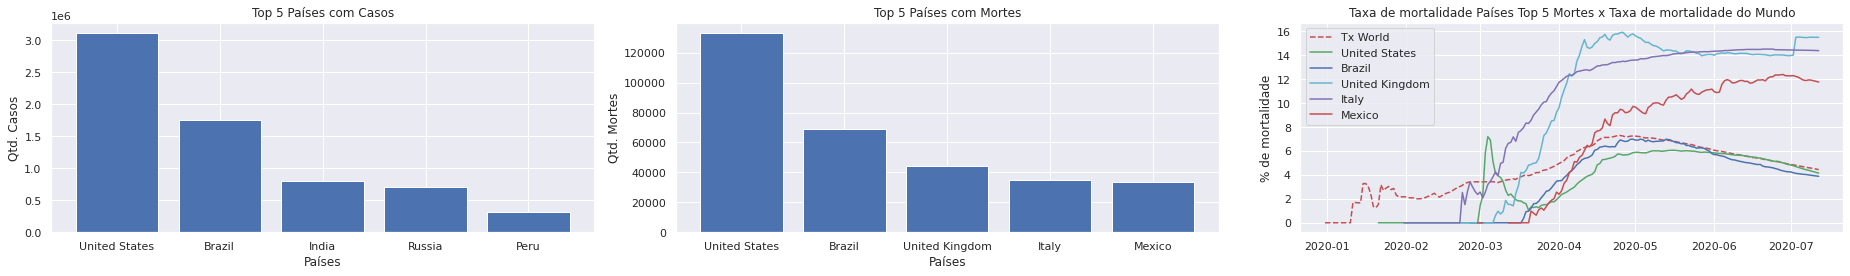

In [183]:
#Top 5 Países com mais casos e mortes de Covid-19

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(26,4))
ax1.bar('location', 'total_cases', data=df_casos)
ax1.set_title('Top 5 Países com Casos')
ax1.set_xlabel('Países')
ax1.set_ylabel('Qtd. Casos')

ax2.bar('location', 'total_deaths', data=df_mortes)
ax2.set_title('Top 5 Países com Mortes')
ax2.set_xlabel('Países')
ax2.set_ylabel('Qtd. Mortes')

ax3.plot(df_mort_World, '--r', label='Tx World')
ax3.plot(df_mort_usa, '-g', label='United States')
ax3.plot(df_mort_br, label='Brazil')
ax3.plot(df_mort_uk, '-c', label='United Kingdom')
ax3.plot(df_mort_ita, '-m', label='Italy')
ax3.plot(df_mort_mex, '-r', label='Mexico')
ax3.set_title('Taxa de mortalidade Países Top 5 Mortes x Taxa de mortalidade do Mundo')
ax3.set_ylabel('% de mortalidade')
plt.legend()

plt.tight_layout()
plt.show()


## Panorama Países Top 5

Podemos observar nos gráficos acima:

*   Os 5 países com mais casos (números absolutos) de Covid-19 no mundo, no período analisado.
*   Os 5 países com mais óbitos (números absolutos) de Covid-19 no mundo, no período analisado.
*   Cálculo da taxa de mortalidade dos países com mais mortes no mundo

Para este último gráfico, é interessante observar que embora Itália e Reino Unido apareçam com altas taxas de mortalidade nos últimos meses, isso ocorre porque há uma diminuição de casos e, com isso, quando ocorrem mortes, o denominador é baixo para "diluir" essa taxa. Observa-se uma taxa elevada de mortalidade no México, o que nos permite questionar se de fato a mortalidade é alta ou se há subnotificação de casos e a notificação só ocorre quando há o óbito.
Embora continue registrando muitos casos de óbitos diariamente, Brasil e Estados Unidos apresentam há quase 2 meses uma taxa de mortalidade decrescente muito em função do aumento de testagem e de algumas medidas de isolamento social implantadas.

Abaixo, prepararemos o dataset para analisar o panorama de novos casos e novas mortes diárias para visualizarmos o comportamento destas variáveis.


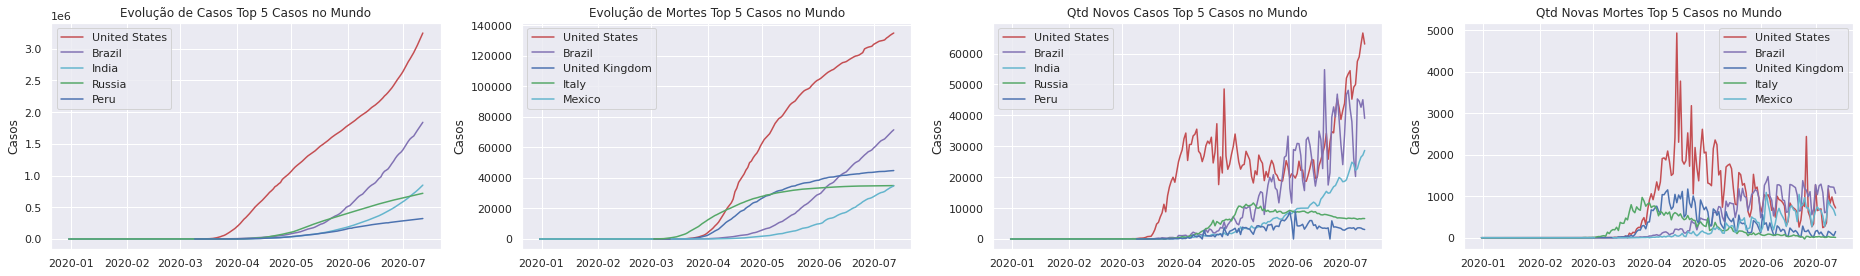

In [184]:
# Elaboração dos gráficos de novos casos, novas mortes, acumulado de casos e acumulado de mortes

fig, (ax3, ax4, ax1, ax2) = plt.subplots(nrows=1, ncols=4, figsize=(26,4))

ax1.plot(df_UnitedStates['new_cases'], '-r', label='United States')
ax1.plot(df_Brazil['new_cases'], '-m', label='Brazil')
ax1.plot(df_India['new_cases'], '-c', label='India')
ax1.plot(df_Russia['new_cases'], '-g', label='Russia')
ax1.plot(df_Peru['new_cases'], label='Peru')
ax1.set_title('Qtd Novos Casos Top 5 Casos no Mundo')
ax1.set_ylabel('Casos')
ax1.legend()

ax2.plot(df_UnitedStates['new_deaths'], '-r', label='United States')
ax2.plot(df_Brazil['new_deaths'], '-m', label='Brazil')
ax2.plot(df_UnitedKingdom['new_deaths'], label='United Kingdom')
ax2.plot(df_Italy['new_deaths'], '-g', label='Italy')
ax2.plot(df_Mexico['new_deaths'], '-c', label='Mexico')
ax2.set_title('Qtd Novas Mortes Top 5 Casos no Mundo')
ax2.set_ylabel('Casos')
ax2.legend()

ax3.plot(df_UnitedStates['total_cases'], '-r', label='United States')
ax3.plot(df_Brazil['total_cases'], '-m', label='Brazil')
ax3.plot(df_India['total_cases'], '-c', label='India')
ax3.plot(df_Russia['total_cases'], '-g', label='Russia')
ax3.plot(df_Peru['total_cases'], label='Peru')
ax3.set_title('Evolução de Casos Top 5 Casos no Mundo')
ax3.set_ylabel('Casos')
ax3.legend()

ax4.plot(df_UnitedStates['total_deaths'], '-r', label='United States')
ax4.plot(df_Brazil['total_deaths'], '-m', label='Brazil')
ax4.plot(df_UnitedKingdom['total_deaths'], label='United Kingdom')
ax4.plot(df_Italy['total_deaths'], '-g', label='Italy')
ax4.plot(df_Mexico['total_deaths'], '-c', label='Mexico')
ax4.set_title('Evolução de Mortes Top 5 Casos no Mundo')
ax4.set_ylabel('Casos')
ax4.legend()

plt.tight_layout()
plt.show()


Sobre os gráficos acima, podemos observar que:

*   Estados Unidos e Brasil continuam em um crescimento contínuo de casos reportados e mortes.
*   A Índia começou a figurar mais recentemente entre o Top 5 comparado com os demais países o que é bastante preocupante dado o seu tamanho populacional.
*   Quando analisamos novos casos, observa-se um aumento de casos nos Estados Unidos a partir de Junho, após um cenário de redução no mês de Maio, certamente fruto do afrouxamento do isolamento social. No Brasil, temos um aumento contínuo dos casos sem um cenário claro de redução como ocorreu nos Estados Unidos em Maio, em função das divergentes políticas públicas de contenção do vírus e queda das taxas de isolament social.
*   Quanto as novas mortes, temos um cenário próximo a um platô destes números nos últimos 2 meses para Estados Unidos, Brasil e México.


Abaixo, preparamos o dataset para uma visualização individualizada por país cuja análise foi sumarizada no tópico acima.

É possível verificar gráficos de:

1. Novos Casos
2. Evolução dos Casos
3. Escala logarítma dos Casos


In [185]:
#Evolução de óbitos por Covid-19 países Top 5 . Dataframe com o top5 até o dia 10/07/2020

Top5 = pd.DataFrame(df, columns = ['location', 'date','total_deaths','total_cases','new_cases_per_million','total_cases_per_million','total_deaths_per_million','total_cases_per_million','new_cases','new_deaths','gdp_per_capita'])
Top5_Casos = Top5[Top5['location'].isin(['United States','Brazil', 'Russia','India','Peru'])]
Top5_Mortes = Top5[Top5['location'].isin(['United States','Brazil', 'United Kingdom','Italy','Mexico'])]

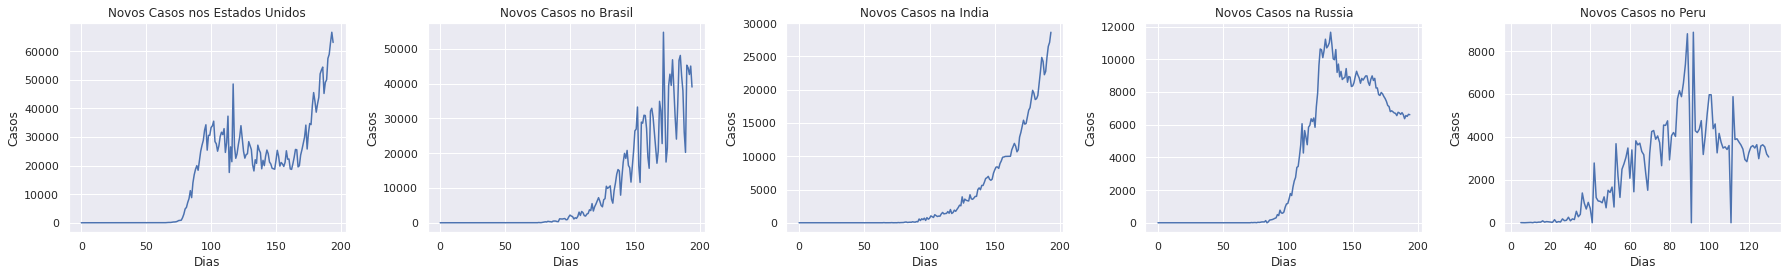

In [186]:
# Gráfico de novos casos

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(25, 4))

x1 = np.arange(len(df_UnitedStates))
z1 = df_UnitedStates['new_cases']
ax1.set_title('Novos Casos nos Estados Unidos')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x1, z1)

x2 = np.arange(len(df_Brazil))
z2 = df_Brazil['new_cases']
ax2.set_title('Novos Casos no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.plot(x2, z2)

x3 = np.arange(len(df_India))
z3 = df_India['new_cases']
ax3.set_title('Novos Casos na India')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Casos')
ax3.plot(x3, z3)

x4 = np.arange(len(df_Russia))
z4 = df_Russia['new_cases']
ax4.set_title('Novos Casos na Russia')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Casos')
ax4.plot(x4, z4)

x5 = np.arange(len(df_Peru))
z5 = df_Peru['new_cases']
ax5.set_title('Novos Casos no Peru')
ax5.set_xlabel('Dias')
ax5.set_ylabel('Casos')
ax5.plot(x5, z5)

plt.tight_layout()
plt.show()

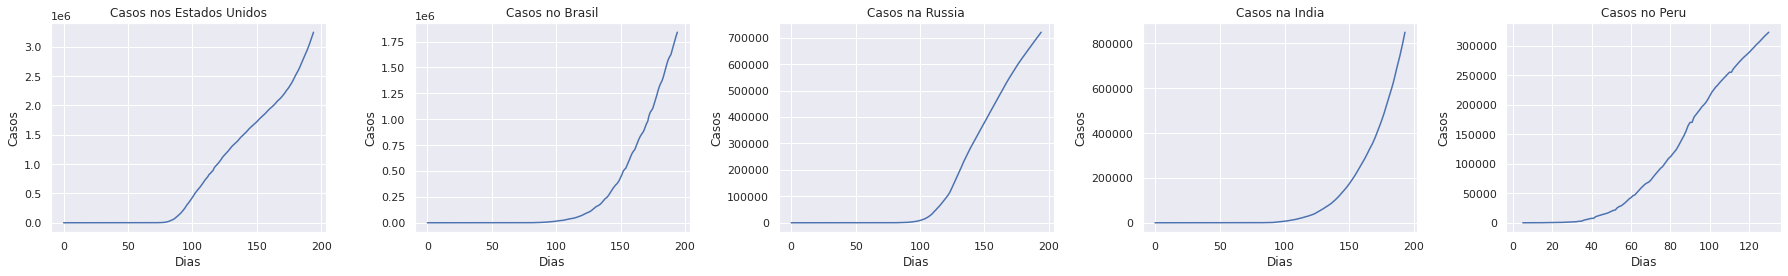

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(25, 4))

x1 = np.arange(len(df_UnitedStates))
z1 = df_UnitedStates['total_cases']
ax1.set_title('Casos nos Estados Unidos')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x1, z1)

x2 = np.arange(len(df_Brazil))
z2 = df_Brazil['total_cases']
ax2.set_title('Casos no Brasil')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.plot(x2, z2)

x3 = np.arange(len(df_Russia))
z3 = df_Russia['total_cases']
ax3.set_title('Casos na Russia')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Casos')
ax3.plot(x3, z3)

x4 = np.arange(len(df_India))
z4 = df_India['total_cases']
ax4.set_title('Casos na India')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Casos')
ax4.plot(x4, z4)

x5 = np.arange(len(df_Peru))
z5 = df_Peru['total_cases']
ax5.set_title('Casos no Peru')
ax5.set_xlabel('Dias')
ax5.set_ylabel('Casos')
ax5.plot(x5, z5)

plt.tight_layout()

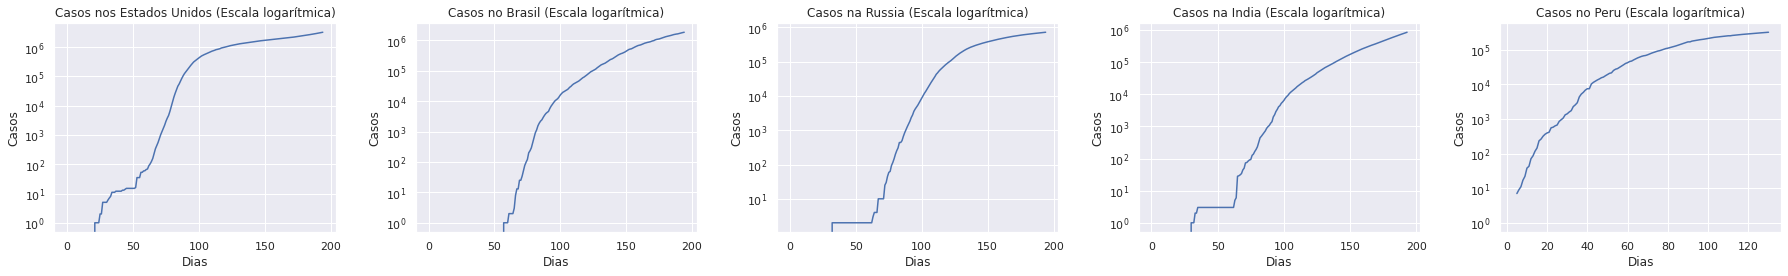

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(25, 4))

x1 = np.arange(len(df_UnitedStates))
z1 = df_UnitedStates['total_cases']
ax1.set_title('Casos nos Estados Unidos (Escala logarítmica)')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.set_yscale('log')
ax1.plot(x1, z1)

x2 = np.arange(len(df_Brazil))
z2 = df_Brazil['total_cases']
ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x2, z2)

x3 = np.arange(len(df_Russia))
z3 = df_Russia['total_cases']
ax3.set_title('Casos na Russia (Escala logarítmica)')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Casos')
ax3.set_yscale('log')
ax3.plot(x3, z3)

x4 = np.arange(len(df_India))
z4 = df_India['total_cases']
ax4.set_title('Casos na India (Escala logarítmica)')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Casos')
ax4.set_yscale('log')
ax4.plot(x4, z4)

x5 = np.arange(len(df_Peru))
z5 = df_Peru['total_cases']
ax5.set_title('Casos no Peru (Escala logarítmica)')
ax5.set_xlabel('Dias')
ax5.set_ylabel('Casos')
ax5.set_yscale('log')
ax5.plot(x5, z5)

plt.tight_layout()

## Informações Adicionais sobre o COVID-19 no Brasil

Abaixo segue um script para avaliar o ritmo do óbito no nosso País e podemos observar a seguinte cronologia:

1. O primeiro caso de COVID-19 no Brasil foi registrado no dia 26/02/2020.
2. O primeiro óbito ocorreu no dia 18/03/2020.
3. 21 dias separaram o 1o óbito do nosso 1o caso.
4. Levamos **24 dias** entre o primeiro óbito e a marca de mais de 1.000 óbitos.
5. Levamos **31 dias** entre o primeiro óbito e a marca de mais de 2.000 óbitos no Brasil. 
6. Levamos **37 dias** entre o primeiro óbito e a marca de mais de 3.000 óbitos no Brasil. 
7. Levamos **39 dias** entre o primeiro óbito e a marca de mais de 4.000 óbitos no Brasil. 
8. Levamos **42 dias** entre o primeiro óbito e a marca de mais de 5.000 óbitos no Brasil.
9. Levamos **53 dias** entre o primeiro óbito e a marca de mais de 10.000 óbitos no Brasil.
10. Levamos **65 dias** entre o primeiro óbito e a marca de mais de 20.000 óbitos no Brasil.
11. Levamos **77 dias** entre o primeiro óbito e a marca de mais de 30.000 óbitos no Brasil.
12. Levamos **86 dias** entre o primeiro óbito e a marca de mais de 40.000 óbitos no Brasil.
13. Levamos **96 dias** entre o primeiro óbito e a marca de mais de 50.000 óbitos no Brasil.
14. Levamos **106 dias** entre o primeiro óbito e a marca de mais de 60.000 óbitos no Brasil.
15. Levamos **115 dias** entre o primeiro óbito e a marca de mais de 70.000 óbitos no Brasil.


Analisando a cronologia acima, podemos dizer que:
1. Atingimos a marca de 1.000 óbitos com uma média de **42 mortes/dia**.
2. A partir de 1.000 óbitos, atingimos a marca de 2.000 óbitos com uma média de **143 mortes/dia**.
3. A partir de 2.000 óbitos, atingimos a marca de 3.000 óbitos com uma média de **167 mortes/dia**.
4. A partir de 3.000 óbitos, atingimos a marca de 4.000 óbitos com uma média de **500 mortes/dia**.
5. A partir de 4.000 óbitos, atingimos a marca de 5.000 óbitos com uma média de **333 mortes/dia**.
6. A partir de 5.000 óbitos, atingimos a marca de 10.000 óbitos com uma média de **455 mortes/dia**.
7. A partir de 10.000 óbitos, atingimos a marca de 20.000 óbitos com uma média de **834 mortes/dia**.
8. A partir de 20.000 óbitos, atingimos a marca de 30.000 óbitos com uma média de **834 mortes/dia**.
9. A partir de 30.000 óbitos, atingimos a marca de 40.000 óbitos com uma média de **1.111 mortes/dia**.
10. A partir de 40.000 óbitos, atingimos a marca de 50.000 óbitos com uma média de **1.000 mortes/dia**.
11. A partir de 50.000 óbitos, atingimos a marca de 60.000 óbitos com uma média de **1.000 mortes/dia**.
12. A partir de 60.000 óbitos, atingimos a marca de 70.000 óbitos com uma média de **1.111 mortes/dia**.

In [ ]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.

# identificaçãso do primeiro caso
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[3883]))

O primeiro caso foi registrado em 2020-02-26 00:00:00


In [ ]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

# Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1) 

print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[3904]))

A primeira morte foi registrada em 2020-03-18 00:00:00


In [ ]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado. Calculando tempo desde o primeiro caso até a primeira morte
from datetime import date
delta = df_brasil.date.loc[3904] - df_brasil.date.loc[3883]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


In [ ]:
df_1k = df_brasil.loc[df_brasil['total_deaths'] > 999].head(1)
df_2k = df_brasil.loc[df_brasil['total_deaths'] > 1999].head(1)
df_3k = df_brasil.loc[df_brasil['total_deaths'] > 2999].head(1)
df_4k = df_brasil.loc[df_brasil['total_deaths'] > 3999].head(1)
df_5k = df_brasil.loc[df_brasil['total_deaths'] > 4999].head(1)
df_10k = df_brasil.loc[df_brasil['total_deaths'] > 9999].head(1)
df_20k = df_brasil.loc[df_brasil['total_deaths'] > 19999].head(1)
df_30k = df_brasil.loc[df_brasil['total_deaths'] > 29999].head(1)
df_40k = df_brasil.loc[df_brasil['total_deaths'] > 39999].head(1)
df_50k = df_brasil.loc[df_brasil['total_deaths'] > 49999].head(1)
df_60k = df_brasil.loc[df_brasil['total_deaths'] > 59999].head(1)
df_70k = df_brasil.loc[df_brasil['total_deaths'] > 69999].head(1)

print('Index {} > 1000 óbitos no Brasil.'.format(df_1k.index))
print('Index {} > 2000 óbitos no Brasil.'.format(df_2k.index))
print('Index {} > 3000 óbitos no Brasil.'.format(df_3k.index))
print('Index {} > 4000 óbitos no Brasil.'.format(df_4k.index))
print('Index {} > 5000 óbitos no Brasil.'.format(df_5k.index))
print('Index {} > 10000 óbitos no Brasil.'.format(df_10k.index))
print('Index {} > 20000 óbitos no Brasil.'.format(df_20k.index))
print('Index {} > 30000 óbitos no Brasil.'.format(df_30k.index))
print('Index {} > 40000 óbitos no Brasil.'.format(df_40k.index))
print('Index {} > 50000 óbitos no Brasil.'.format(df_50k.index))
print('Index {} > 60000 óbitos no Brasil.'.format(df_60k.index))
print('Index {} > 70000 óbitos no Brasil.'.format(df_70k.index))

Index Int64Index([3928], dtype='int64') > 1000 óbitos no Brasil.
Index Int64Index([3935], dtype='int64') > 2000 óbitos no Brasil.
Index Int64Index([3941], dtype='int64') > 3000 óbitos no Brasil.
Index Int64Index([3943], dtype='int64') > 4000 óbitos no Brasil.
Index Int64Index([3946], dtype='int64') > 5000 óbitos no Brasil.
Index Int64Index([3957], dtype='int64') > 10000 óbitos no Brasil.
Index Int64Index([3969], dtype='int64') > 20000 óbitos no Brasil.
Index Int64Index([3981], dtype='int64') > 30000 óbitos no Brasil.
Index Int64Index([3990], dtype='int64') > 40000 óbitos no Brasil.
Index Int64Index([4000], dtype='int64') > 50000 óbitos no Brasil.
Index Int64Index([4010], dtype='int64') > 60000 óbitos no Brasil.
Index Int64Index([4019], dtype='int64') > 70000 óbitos no Brasil.


In [187]:
delta1 = df_brasil.date.loc[3928] - df_brasil.date.loc[3904] #1000
delta2 = df_brasil.date.loc[3935] - df_brasil.date.loc[3904] #2000
delta3 = df_brasil.date.loc[3941] - df_brasil.date.loc[3904] #3000
delta4 = df_brasil.date.loc[3943] - df_brasil.date.loc[3904] #4000
delta5 = df_brasil.date.loc[3946] - df_brasil.date.loc[3904] #5000
delta6 = df_brasil.date.loc[3957] - df_brasil.date.loc[3904] #10000
delta7 = df_brasil.date.loc[3969] - df_brasil.date.loc[3904] #20000
delta8 = df_brasil.date.loc[3981] - df_brasil.date.loc[3904] #30000
delta9 = df_brasil.date.loc[3990] - df_brasil.date.loc[3904] #40000
delta10 = df_brasil.date.loc[4000] - df_brasil.date.loc[3904] #50000
delta11 = df_brasil.date.loc[4010] - df_brasil.date.loc[3904] #60000
delta12 = df_brasil.date.loc[4019] - df_brasil.date.loc[3904] #60000

print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 1000 óbitos no Brasil.'.format(delta1.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 2000 óbitos no Brasil.'.format(delta2.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 3000 óbitos no Brasil.'.format(delta3.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 4000 óbitos no Brasil.'.format(delta4.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 5000 óbitos no Brasil.'.format(delta5.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 10000 óbitos no Brasil.'.format(delta6.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 20000 óbitos no Brasil.'.format(delta7.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 30000 óbitos no Brasil.'.format(delta8.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 40000 óbitos no Brasil.'.format(delta9.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 50000 óbitos no Brasil.'.format(delta10.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 60000 óbitos no Brasil.'.format(delta11.days))
print('Se passaram {} dias entre o primeiro óbito e a marca de mais de 70000 óbitos no Brasil.'.format(delta12.days))

Se passaram 24 dias entre o primeiro óbito e a marca de mais de 1000 óbitos no Brasil.
Se passaram 31 dias entre o primeiro óbito e a marca de mais de 2000 óbitos no Brasil.
Se passaram 37 dias entre o primeiro óbito e a marca de mais de 3000 óbitos no Brasil.
Se passaram 39 dias entre o primeiro óbito e a marca de mais de 4000 óbitos no Brasil.
Se passaram 42 dias entre o primeiro óbito e a marca de mais de 5000 óbitos no Brasil.
Se passaram 53 dias entre o primeiro óbito e a marca de mais de 10000 óbitos no Brasil.
Se passaram 65 dias entre o primeiro óbito e a marca de mais de 20000 óbitos no Brasil.
Se passaram 77 dias entre o primeiro óbito e a marca de mais de 30000 óbitos no Brasil.
Se passaram 86 dias entre o primeiro óbito e a marca de mais de 40000 óbitos no Brasil.
Se passaram 96 dias entre o primeiro óbito e a marca de mais de 50000 óbitos no Brasil.
Se passaram 106 dias entre o primeiro óbito e a marca de mais de 60000 óbitos no Brasil.
Se passaram 115 dias entre o primeir

## Conclusão

Diante da análise dos dados disponibilizados pela **[Our World in Data](https://ourworldindata.org/)**, podemos observar que a pandemia apresenta diferentes estágios de contaminação ao redor do mundo. No entanto, gostaria de chamar atenção para Estados Unidos e Brasil que, mesmo após quase 4 meses do primeiro caso de COVID-19 em seus territórios, não conseguiram evitar que tantas mortes acontecessem e que tantos casos continuem ainda se propagando. Enquanto países como China, Itália e Reino Unido passaram por aproximadamente 2 meses de lockdown para controlar seus casos, Brasil e Estados Unidos tiveram pouca efetividade em atingir níveis de isolamento social altos por um tempo razoável e, antes mesmo de apresentarem medidas públicas efetivas no combate ao vírus, realizaram um afrouxamento do isolamento social que não contribui para diminuir os casos que, no Brasil, resulta em um platô absurdo de média de 1.000 vidas perdidas nas últimas semanas. Ou seja, 1.000 famílias sentindo os efeitos da perda de um ente querido em seus lares **todos os dias**. O que esperar dos próximos dias?